1.IMPORTING LIBRARIES

In [1]:


import csv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd


from sklearn.model_selection import train_test_split

2.NUM_OF_CLASSESS

In [2]:
RANDOM_SEED = 42
NUM_CLASSES = 36


3.PATHS

In [3]:
dataset = 'keypoint.csv'
model_save_path = 'keypoint_classifier.keras.h5'

4.splitting in training & testing (X- data Y- label)

In [4]:
x_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

5. model archi

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 50)                2150      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 36)                936       
                                                                 
Total params: 4361 (17.04 KB)
Trainable params: 4361 (17.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


6.CALLBACKS

In [7]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

7.COMPILE

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

8. MODEL FIT

In [9]:
# change epoch to 800-1000
history = model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/13 [=>............................] - ETA: 11s - loss: 3.6118 - accuracy: 0.0391
Epoch 1: saving model to keypoint_classifier.keras.h5
13/13 [==============================] - 1s 28ms/step - loss: 3.5846 - accuracy: 0.0318 - val_loss: 3.4719 - val_accuracy: 0.0951
Epoch 2/1000
 1/13 [=>............................] - ETA: 0s - loss: 3.5289 - accuracy: 0.0234
Epoch 2: saving model to keypoint_classifier.keras.h5
13/13 [==============================] - 0s 8ms/step - loss: 3.4480 - accuracy: 0.0666 - val_loss: 3.3522 - val_accuracy: 0.1735
Epoch 3/1000
 1/13 [=>............................] - ETA: 0s - loss: 3.4259 - accuracy: 0.1172

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to keypoint_classifier.keras.h5
13/13 [==============================] - 0s 8ms/step - loss: 3.3294 - accuracy: 0.1146 - val_loss: 3.2179 - val_accuracy: 0.1698
Epoch 4/1000
 1/13 [=>............................] - ETA: 0s - loss: 3.2807 - accuracy: 0.1641
Epoch 4: saving model to keypoint_classifier.keras.h5
13/13 [==============================] - 0s 9ms/step - loss: 3.1804 - accuracy: 0.1469 - val_loss: 3.0683 - val_accuracy: 0.1847
Epoch 5/1000
 1/13 [=>............................] - ETA: 0s - loss: 3.0742 - accuracy: 0.1641
Epoch 5: saving model to keypoint_classifier.keras.h5
13/13 [==============================] - 0s 8ms/step - loss: 3.0466 - accuracy: 0.1768 - val_loss: 2.9133 - val_accuracy: 0.1884
Epoch 6/1000
 1/13 [=>............................] - ETA: 0s - loss: 2.9858 - accuracy: 0.1797
Epoch 6: saving model to keypoint_classifier.keras.h5
13/13 [==============================] - 0s 8ms/step - loss: 2.8975 - accuracy: 0.1843 - val_loss: 2.7471 - 

9.EVALUATION

In [10]:
# Model evaluation
val_loss, val_acc = model.evaluate(x_test, y_test, batch_size=500)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')
model = tf.keras.models.load_model(model_save_path)
tf.saved_model.save(model, './')

2/2 [==============================] - 0s 9ms/step - loss: 0.1481 - accuracy: 0.9757
Validation Loss: 0.14805850386619568, Validation Accuracy: 0.9757462739944458


10. MAKING PREDICTIONS

In [11]:
predict_result = model.predict(np.array([x_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 92ms/step
[1.1117344e-28 2.0811058e-24 9.3718704e-33 2.7898360e-31 5.7612878e-30
 2.4155069e-24 7.0644845e-14 1.9702659e-08 4.9580644e-21 1.5118856e-05
 1.7399327e-29 7.3408240e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.6486486e-37 0.0000000e+00 9.4586447e-33 2.1571437e-15 3.4275805e-38
 0.0000000e+00 8.8731438e-14 1.4383323e-31 9.0276102e-05 2.4623317e-01
 1.7763884e-38 1.9578908e-02 2.0612053e-15 0.0000000e+00 4.4757294e-24
 0.0000000e+00 1.8032602e-17 3.1986613e-38 0.0000000e+00 1.6498775e-27
 3.8181989e-33]
11


11.CONFUSION MATRIX

17/17 [==============================] - 0s 2ms/step


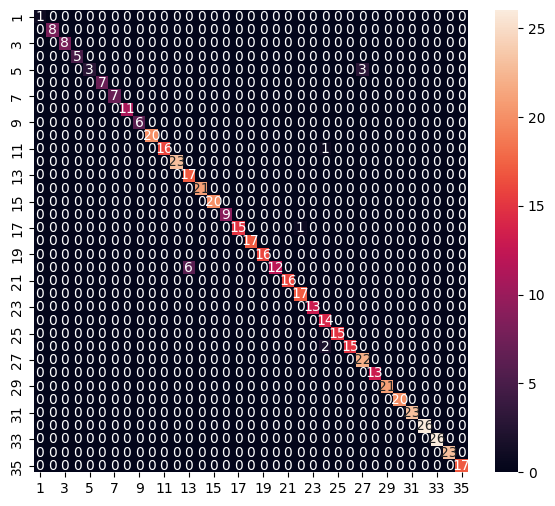

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      0.50      0.67         6
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        20
          11       1.00      0.94      0.97        17
          12       1.00      1.00      1.00        23
          13       0.74      1.00      0.85        17
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00         9
          17       1.00      0.94      0.97        16
     

In [12]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))


Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

12.SAVE MODEL AND CONVERT TO TFLITE

In [13]:
model.save("saved_model")
# Convert the SavedModel to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()
# Save the converted model (optional)
with open("converted_model2.tflite", "wb") as f:
    f.write(tflite_model)


13.PERFORMING INFERENCE

In [18]:
with open("converted_model2.tflite", "wb") as f:
    f.write(tflite_model)

converted_model2 = "converted_model2.tflite"
interpreter = tf.lite.Interpreter(model_path=converted_model2)

In [19]:
# Retrieve input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
# Allocate tensors
interpreter.allocate_tensors()

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], np.array([x_test[0]]))

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

In [23]:
%%time
# Perform inference
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 220 µs, sys: 1.01 ms, total: 1.23 ms
Wall time: 6.77 ms


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.1117355e-28 2.0811076e-24 9.3718785e-33 2.7898172e-31 5.7612934e-30
 2.4155181e-24 7.0645041e-14 1.9702714e-08 4.9580879e-21 1.5118899e-05
 1.7399342e-29 7.3408306e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.6486501e-37 0.0000000e+00 9.4586528e-33 2.1571456e-15 3.4516419e-38
 0.0000000e+00 8.8731519e-14 1.4383336e-31 9.0275666e-05 2.4623246e-01
 1.7258210e-38 1.9578999e-02 2.0612070e-15 0.0000000e+00 4.4757163e-24
 0.0000000e+00 1.8032617e-17 3.4516419e-38 0.0000000e+00 1.6498789e-27
 3.8181728e-33]
11
